10/13 week5 14-15장

# 14장. 통계 분석 기법을 이용한 가설 검정

##14-1. 가설 검정이란?

##14-2. t 검정 - 두 집단의 평균 비교하기
- 두 집단의 평균에 통계적으로 유의한 차이가 있는 알아보기

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/da

/content/drive/MyDrive/da


In [4]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

# 기술 통계 분석
mpg.query('category in ["compact", "suv"]') \
          .groupby('category', as_index = False) \
          .agg(n = ('category', 'count'),
     mean = ('cty', 'mean'))

,category,n,mean
0,compact,47,20.12766
1,suv,62,13.50000


In [5]:
compact = mpg.query('category == "compact"')['cty']
suv = mpg.query('category == "suv"')['cty']

In [6]:
#t-test
from scipy import stats
stats.ttest_ind(compact, suv, equal_var = True)

TtestResult(statistic=11.917282584324107, pvalue=2.3909550904711282e-21, df=107.0)

In [7]:
#기술 통계 분석
mpg.query('fl in ["r", "p"]') \
    .groupby('fl', as_index = False) \
    .agg(n = ('fl', 'count'),
         mean = ('cty', 'mean'))

,fl,n,mean
0,p,52,17.365385
1,r,168,16.738095


In [8]:
regular = mpg.query('fl == "r"')['cty']
premium = mpg.query('fl == "p"')['cty']

#t-test
stats.ttest_ind(regular, premium, equal_var = True)

TtestResult(statistic=-1.066182514588919, pvalue=0.28752051088667036, df=218.0)

-> 일반적으로 유의확률 5%를 판단 기준으로 삼고, P-VaIUe가 0.05 미만이면 ‘집단 간 차이가 통계적으로 유의하다’고 해석

- 출력 결과 보면 P-VaIUe가 0.05보다 큰 0.2875...입니다. 실제로는 차이가 없는데 우연에
의해 이런 정도의 차이가 관찰될 확률이 28.75%라는 의미.
- 일반 휘발유와 고급 휘발유를 사용하는 자동차의 도시 연비 차이가 통계적으로 유의하지 않다

##14-3. 상관분석 - 두 변수의 관계 분석하기
- 1에 가까울수록 관련성이 큼. 양수=정비례, 음수=반비례

In [9]:
economics = pd.read_csv('economics.csv')
economics[['unemploy', 'pce']].corr()

,unemploy,pce
unemploy,1.000000,0.614518
pce,0.614518,1.000000


In [10]:
#유의 확률 구하기
#상관분석
stats.pearsonr(economics['unemploy'], economics['pce'])

PearsonRResult(statistic=0.614517614193208, pvalue=6.773527303289964e-61)

In [11]:
#상관행렬 히트맵 만들기
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
car_cor = mtcars.corr()
car_cor = round(car_cor, 2)
car_cor

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


In [13]:
#히트맵 만들기
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '120', #해상도 설정
                     'figure.figsize': [7.5, 5.5]}) #가로 세로 크기 설정

<Axes: >

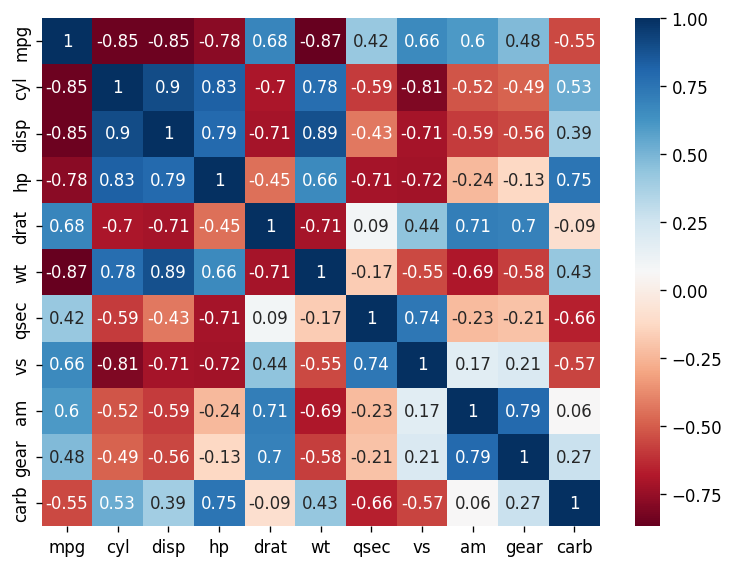

In [14]:
import seaborn as sns
sns.heatmap(car_cor,
            annot = True,
            cmap = 'RdBu')

-> 상관관계 양수면 파란색, 음수면 빨간색

In [15]:
#mask만들기
import numpy as np
mask = np.zeros_like(car_cor)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
#오른쪽 위 대각 행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<Axes: >

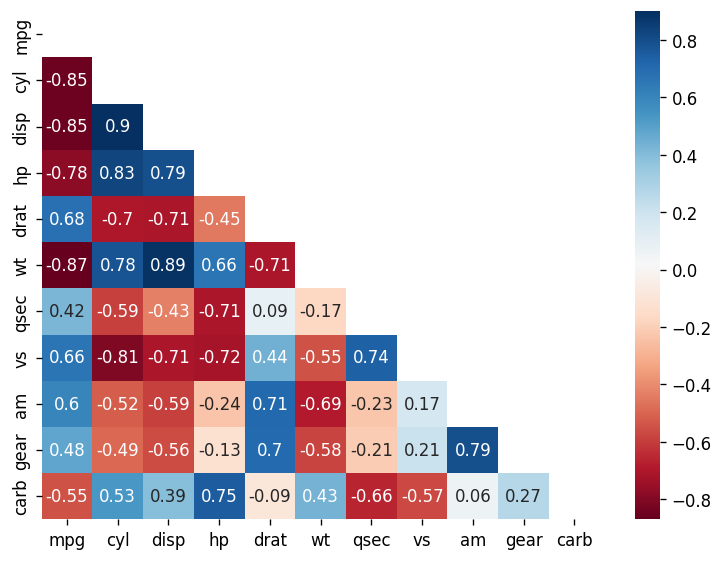

In [17]:
#히트맵에 mask 적용하기
sns.heatmap(car_cor,
            annot = True,
            cmap = 'RdBu',
            mask = mask)

<Axes: >

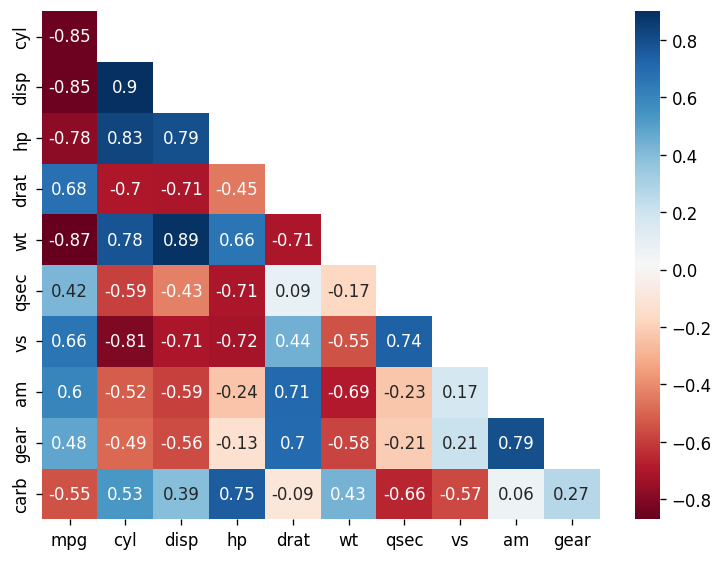

In [18]:
#빈행과 열 제거하기 -> mpg, carb빼기
mask_new = mask[1:, :-1]
cor_new = car_cor.iloc[1:, :-1]

sns.heatmap(data = cor_new,
            annot = True,
            cmap = 'RdBu',
            mask = mask_new)


<Axes: >

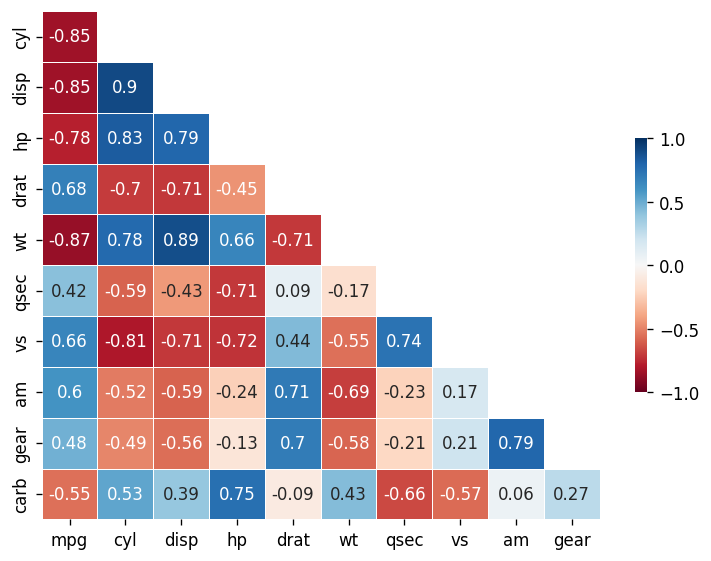

In [19]:
#히트맵 만들기
sns.heatmap(data = cor_new,
            annot = True,
            cmap = 'RdBu',
            mask = mask_new,
            linewidths = .5,
            vmax = 1,
            vmin = -1,
            cbar_kws={'shrink': .5})

# 15장. 머신러닝을 이용한 예측 분석

##15-1. 머신러닝 모델 알아보기
-함수와 비슷
-ex) 환자의 정보 입력하면 당뇨병 발병 여부를 예측하는 모델을 만듦.
사람이 해야할 일은 여러 환자의 정보와 당뇨병 발병 여부 데이터를 수집해 머신러닝 알고리즘에 입력해야함.

- 1단계: 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기
ex) 흡연:yes -> 발병 80%, 정상 20%

- 2단계: 첫 번째 질문의 답변에 따라 데이터를 두 노드로 분할하기
ex) 흡연 yes면 왼쪽 노드, no면 오른쪽 노드

- 3단계: 각 노드에서 타겟 변수를 가장 잘 분리하는 예측 변수 선택하기
ex) 아까 흡연했으니 두 번째 음주, 나이 등의 변수 선택하기

-4단계: 노드가 완벽하게 분리될 때까지 반복하기



##15-2. 소득 예측 모델 만들기

In [21]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


###1. 타겟 변수 전처리

In [22]:
df['income'].value_counts(normalize = True)

,proportion
income,
<=50K,0.760718
>50K,0.239282


In [23]:
# 변수의 값에 특수 문자나 대소문자 섞여있으면 다루기 불편 ... high low로 나누기
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')

###2. 불필요한 변수 제거하기

In [24]:
df = df.drop(columns = 'fnlwgt')

###3. 문자 타입 변수를 숫자 타입으로 바꾸기

In [25]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [26]:
df_tmp['sex'].value_counts()

,count
sex,
Male,32650
Female,16192


In [27]:
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  bool 
 1   sex_Male    48842 non-null  bool 
dtypes: bool(2)
memory usage: 95.5 KB


In [28]:
df_tmp[['sex_Female', 'sex_Male']].head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [29]:
#타겟 변수인 income만 원래대로 유지, 모든 문자 타입 변수를 원핫 인코딩
target = df['income']

df = df.drop(columns = 'income')
df = pd.get_dummies(df)

df['income'] = target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [30]:
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

###4. 데이터 분할하기

In [31]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3,
                                    stratify = df['income'],
                                     random_state = 1234)

In [32]:
#train
df_train.shape

(34189, 108)

In [33]:
#test
df_test.shape

(14653, 108)

In [34]:
#train
df_train['income'].value_counts(normalize = True)

,proportion
income,
low,0.760713
high,0.239287


In [35]:
#test
df_test['income'].value_counts(normalize = True)

,proportion
income,
low,0.760732
high,0.239268


###전처리 완료했으니 의사결정나무 모델 만들기

In [36]:
#모델 설정하기 - 의사결정나무
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 3)

###모델 만들기

In [37]:
print(df.dtypes)


age                                int64
education_num                      int64
capital_gain                       int64
capital_loss                       int64
hours_per_week                     int64
                                   ...  
native_country_Trinadad&Tobago      bool
native_country_United-States        bool
native_country_Vietnam              bool
native_country_Yugoslavia           bool
income                            object
Length: 108, dtype: object


In [38]:
#clf는 분류 모델 classifier , 예측 변수 추출, 타겟 변수 추출
# 독립 변수와 종속 변수 나누기
train_x = df_train.drop(columns='income')
train_y = df_train['income']

# 모델 학습
model = clf.fit(train_x, train_y)  # x=와 y= 없이 실행

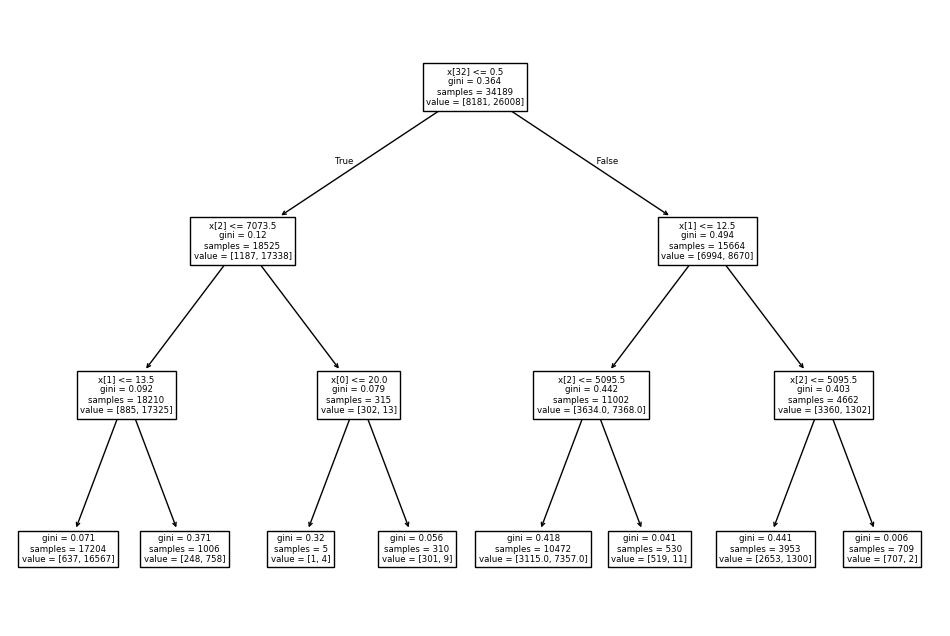

In [39]:
#모델 구조 살펴보기
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100', #해상도 설정
                     'figure.figsize': [12, 8]}) #가로 세로 크기 설정
tree.plot_tree(model);

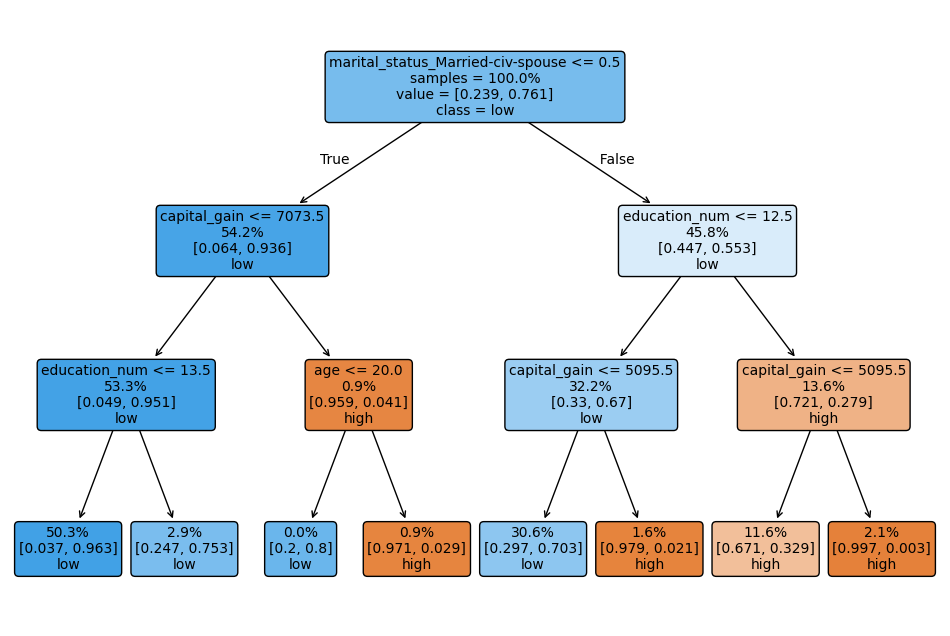

In [40]:
#tree에 파라미터 추가해 그래프 보기 좋게 수정
tree.plot_tree(model,
              feature_names = list(train_x.columns),
              class_names = ['high', 'low'],
              proportion = True,
              filled = True,
               rounded = True,
               impurity = False,
               label = 'root',
               fontsize = 10);

###모델 이용해 예측하기

In [41]:
#예측 변수 추출, 타겟 변수 추출
test_x = df_test.drop(columns = 'income')
test_y = df_test['income']

In [42]:
#예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low


###성능 평가하기

In [43]:
#성능 평가, 모델이 예측한 값 중 맞은 경우와 틀린 경우의 빈도를 나타낸 컨퓨전 매트릭스
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],
                            y_pred = df_test['pred'],
                            labels = ['high', 'low'])
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

In [44]:
#컨퓨전 매트릭스 히트맵 만들기
plt.rcParams.update(plt.rcParamsDefault)

from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,
                           display_labels = ['high', 'low'])
p.plot(cmap = 'Blues')

###성능 평가 지표 구하기
- 정확도: TP+TN / TP+TN+FP+FN
- 정밀도: TP / TP + FP(실제로는 N, 예측은 P) = 예측 P들 중 진짜 P
- 재현율: TP / TP + FN(실제로는 P, 예측은 N) =실제 P들 중 진짜 P

In [45]:
#성능 평가 지표 구하기
#정확도
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'],
                        y_pred = df_test['pred'])

0.8439227461953184

In [46]:
#정밀도
metrics.precision_score(y_true = df_test['income'],
                        y_pred = df_test['pred'],
                        pos_label = 'high')

0.7557700377675199

In [47]:
#재현율
metrics.recall_score(y_true = df_test['income'],
                     y_pred = df_test['pred'],
                     pos_label = 'high')

0.5136908157444381

In [48]:
#F1 score(recall과 precision의 크기 함께 반영)
metrics.f1_score(y_true = df_test['income'],
                 y_pred = df_test['pred'],
                 pos_label = 'high')

0.6116488368143997

###성능 평가 지표들 중 무엇을 사용해야할까?
-  precision : 관심 클래스가 분명할 때
ex) 고소득자를 예
측해 고가의 제품을 홍보한다면 모델이 고소득자로 예측했을 때 얼마나 잘 맞는지 살펴봐야하므로 Precision을 기준으로 평가
-  recall: 관심 클래스를 최대한 많이 찾아내야 할 때
ex) 전염병에 감염된 사람을 최대한 많이 찾아내 격리해야 한다면, 실제로 전염병에 감염된 사람 중에서 몇 퍼센트를 감염된 것으로 예측하는지 살펴봐야 하므로 recall을 기준으로 평가

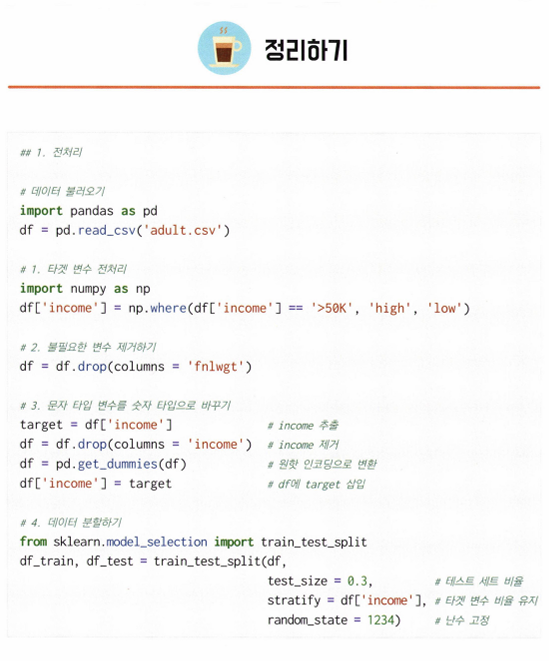

In [51]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DA_week5.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DA_week5.ipynb to html
[NbConvertApp] Writing 1767782 bytes to /content/drive/MyDrive/Colab Notebooks/DA_week5.html
